### Target Game Analysis

What follows will be an analysis of peformance, training, and various other metrics with regards to the target game environment.

Note that the models we will be speaking of have already been trained.

In [1]:
import sys, os
print(os.getcwd())

c:\Users\karat\Documents\topics_in_cs1\DRL-Assignment\notebooks


In [2]:
# Importing relevant libraries
import sys, os
import matplotlib.pyplot as plt

racing_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "envs", "racing_game"))
target_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "envs", "target_game"))
sys.path.append(racing_dir)
from racing_env import RacingEnv
sys.path.append(target_dir)
from target_env import TargetEnv

train_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.append(train_dir)
from test_models import SACTester, PPOTester, DDPGTester, A2CTester

c:\Users\karat\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


[2025-10-26 20:14:31] MultiLogger Initialized


In [3]:
# Creating needed objects
tenv = TargetEnv()
s = SACTester('pretrained_SAC_target.pt', tenv)
p = PPOTester('pretrained_PPO_target.pt', tenv)
d = DDPGTester('pretrained_DDPG_target.pt', tenv)
a = A2CTester('pretrained_A2C_target.pt', tenv)

Unfortunately, a jupyter notebook doesn't seem to be able to actually render pygame. We'll settle for collecting data on how the agents play, and you can observe them playing elsewhere. Note that this script takes an absolutely ungodly amount of time to run because jupyter notebooks suck, so we're sticking to ten episodes and noting that this means data may be subject to more noise.

In [4]:
ppo_res = p.test(n_episodes=10, visual=False)
sac_res = s.test(n_episodes=10, visual=False)
ddpg_res = d.test(n_episodes=10, visual=False)
a2c_res = a.test(n_episodes=10, visual=False)

In [5]:
#print(ppo_res)

In [6]:
episode_infos = ppo_res[1]

# Find the maximum number of steps among all episodes
max_steps = max(len(ep) for ep in episode_infos)

mean_positions = []
for step_idx in range(max_steps):
    sum_pos = [0.0, 0.0]
    count = 0

    for ep in episode_infos:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                position = stepinfo['agent_position']
                sum_pos[0] += position[0]
                sum_pos[1] += position[1]
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_positions.append([sum_pos[0] / count, sum_pos[1] / count])
    else:
        mean_positions.append([None, None])  # or skip, depending on your needs

# print(mean_positions)

In [7]:
episode_infos = sac_res[1]

# Find the maximum number of steps among all episodes
max_steps = max(len(ep) for ep in episode_infos)

mean_positions2 = []
for step_idx in range(max_steps):
    sum_pos = [0.0, 0.0]
    count = 0

    for ep in episode_infos:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                position = stepinfo['agent_position']
                sum_pos[0] += position[0]
                sum_pos[1] += position[1]
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_positions2.append([sum_pos[0] / count, sum_pos[1] / count])
    else:
        mean_positions2.append([None, None])  # or skip, depending on your needs

#print(mean_positions2)


In [8]:
episode_infos = ddpg_res[1]

# Find the maximum number of steps among all episodes
max_steps = max(len(ep) for ep in episode_infos)

mean_positions3 = []
for step_idx in range(max_steps):
    sum_pos = [0.0, 0.0]
    count = 0

    for ep in episode_infos:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                position = stepinfo['agent_position']
                sum_pos[0] += position[0]
                sum_pos[1] += position[1]
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_positions3.append([sum_pos[0] / count, sum_pos[1] / count])
    else:
        mean_positions3.append([None, None])  # or skip, depending on your needs

#print(mean_positions2)

In [9]:
episode_infos = a2c_res[1]

# Find the maximum number of steps among all episodes
max_steps = max(len(ep) for ep in episode_infos)

mean_positions4 = []
for step_idx in range(max_steps):
    sum_pos = [0.0, 0.0]
    count = 0

    for ep in episode_infos:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                position = stepinfo['agent_position']
                sum_pos[0] += position[0]
                sum_pos[1] += position[1]
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_positions4.append([sum_pos[0] / count, sum_pos[1] / count])
    else:
        mean_positions4.append([None, None])  # or skip, depending on your needs

#print(mean_positions2)

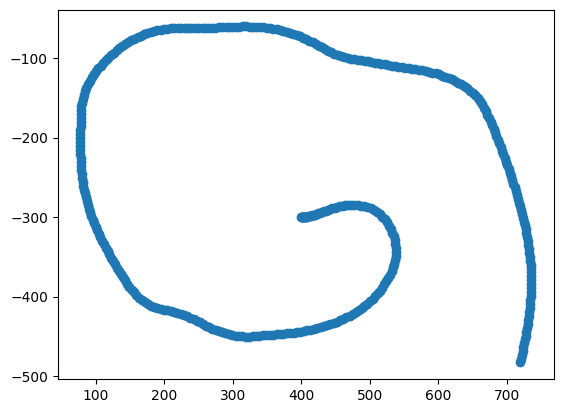

In [10]:
x = [point[0] for point in mean_positions]
y = [-point[1] for point in mean_positions] # because of how pygame handles position
plt.scatter(x, y)
plt.show()

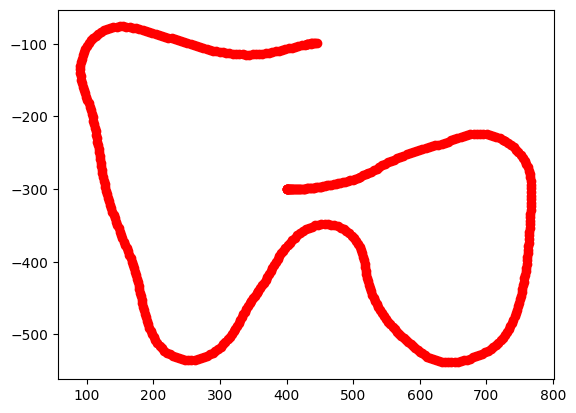

In [11]:
x2 = [point[0] for point in mean_positions2]
y2 = [-point[1] for point in mean_positions2]
plt.scatter(x2, y2, color='red')
plt.show()

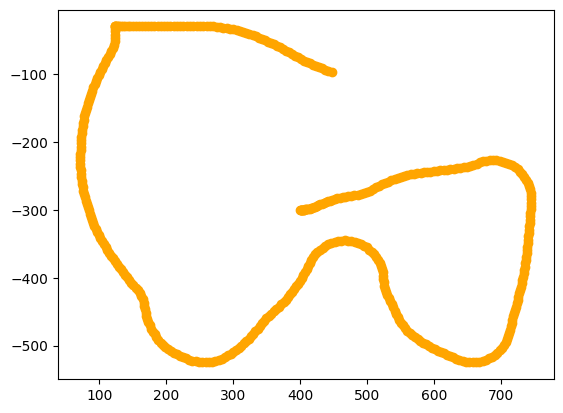

In [12]:
x3 = [point[0] for point in mean_positions3]
y3 = [-point[1] for point in mean_positions3]
plt.scatter(x3, y3, color='orange')
plt.show()

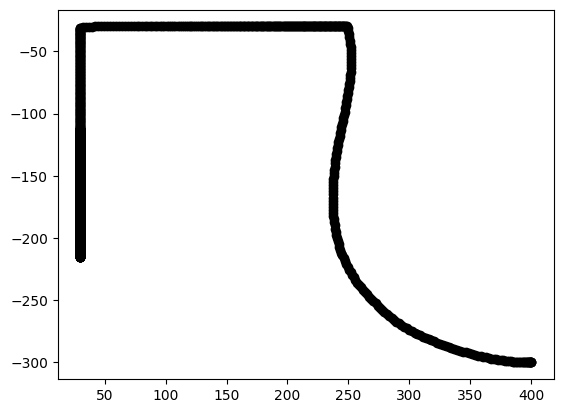

In [13]:
x4 = [point[0] for point in mean_positions4]
y4 = [-point[1] for point in mean_positions4]
plt.scatter(x4, y4, color='black')
plt.show()

Admittedly I plotted these because I didn't even need to adapt anything from the other notebook, they're less useful than the mean position plots there. Still, it does provide a relatively good snapshot of what's going on. The A2C model, as usual, does terribly. SAC and DDPG models find very similar lines, but SAC is just a tidbit more optimized. Then the PPO model is just kind of okay. It has a weird spiral, but it's not too bad.

In [14]:
ep_inf_p = ppo_res[1]
ep_inf_s = sac_res[1]
ep_inf_d = ddpg_res[1]
ep_inf_a = a2c_res[1]

avg_len_p  = 0.0
avg_len_s = 0.0
avg_len_d = 0.0
avg_len_a = 0.0

for episode in ep_inf_p:
    avg_len_p += len(episode)
avg_len_p /= len(ep_inf_p)

for episode in ep_inf_s:
    avg_len_s += len(episode)
avg_len_s /= len(ep_inf_s)

for episode in ep_inf_d:
    avg_len_d += len(episode)
avg_len_d /= len(ep_inf_d)

for episode in ep_inf_a:
    avg_len_a += len(episode)
avg_len_a /= len(ep_inf_a)

print(f"Average length of PPO episode: {avg_len_p:.2f} | Average length of SAC episode: {avg_len_s:.2f}\n"
      f"Average length of DDPG episode: {avg_len_d:.2f} | Average length of A2C episode: {avg_len_a:.2f}")

Average length of PPO episode: 390.00 | Average length of SAC episode: 470.00
Average length of DDPG episode: 457.00 | Average length of A2C episode: 2000.00


As with the racing game. the PPO which looks like it has a terrible line is actually somehow doing the best. A2C is clearly not even finishing their episodes, since each goes to the max.

In [15]:
ep_inf_p = ppo_res[1]
ep_inf_s = sac_res[1]
ep_inf_d = ddpg_res[1]
ep_inf_a = a2c_res[1]

crashes_p  = 0
crashes_s = 0
crashes_d = 0
crashes_a = 0

for episode in ep_inf_p:
    crashes_p += episode[-1]['obstacles_hit']
for episode in ep_inf_s:
    crashes_s += episode[-1]['obstacles_hit']
for episode in ep_inf_d:
    crashes_d += episode[-1]['obstacles_hit']
for episode in ep_inf_a:
    crashes_a += episode[-1]['obstacles_hit']
print(f"Total obstacles hit over PPO episodes: {crashes_p:.2f} | Total obstacles hit over SAC episodes: {crashes_s:.2f}\n"
      f"Total obstalces hit over DDPG episodes: {crashes_d:.2f} | Total obstacles hit over A2C episodes: {crashes_a:.2f}")

Total obstacles hit over PPO episodes: 0.00 | Total obstacles hit over SAC episodes: 0.00
Total obstalces hit over DDPG episodes: 0.00 | Total obstacles hit over A2C episodes: 0.00


No shenanigans are unearthed here. PPO is just actually winning the fastest, and everyone is doing a good job of avoiding obstacles. Possibly too good in the case of A2C, since it clearly could stand to be taking a few more risks. Might be an indicator of the rewards being improperly tuned for A2C.

In [16]:
ep_inf_p = ppo_res[1]
ep_inf_s = sac_res[1]
ep_inf_d = ddpg_res[1]
ep_inf_a = a2c_res[1]

# Find the maximum number of steps among all episodes
max_steps_p = max(len(ep) for ep in ep_inf_p)
max_steps_s = max(len(ep) for ep in ep_inf_s)
max_steps_d = max(len(ep) for ep in ep_inf_d)
max_steps_a = max(len(ep) for ep in ep_inf_a)

mean_speeds = []
for step_idx in range(max_steps_p):
    sum_speed = 0.0
    count = 0

    for ep in ep_inf_p:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                speed = stepinfo['agent_speed']
                sum_speed += speed
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_speeds.append(sum_speed / count)
    else:
        mean_speeds.append(None)

mean_speeds2 = []
for step_idx in range(max_steps_s):
    sum_speed = 0.0
    count = 0

    for ep in ep_inf_s:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                speed = stepinfo['agent_speed']
                sum_speed += speed
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_speeds2.append(sum_speed / count)
    else:
        mean_speeds2.append(None)

mean_speeds3 = []
for step_idx in range(max_steps_d):
    sum_speed = 0.0
    count = 0

    for ep in ep_inf_d:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                speed = stepinfo['agent_speed']
                sum_speed += speed
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_speeds3.append(sum_speed / count)
    else:
        mean_speeds3.append(None)

mean_speeds4 = []
for step_idx in range(max_steps_a):
    sum_speed = 0.0
    count = 0

    for ep in ep_inf_a:
        if step_idx < len(ep):
            stepinfo = ep[step_idx]
            try:
                speed = stepinfo['agent_speed']
                sum_speed += speed
                count += 1
            except KeyError:
                pass

    if count > 0:
        mean_speeds4.append(sum_speed / count)
    else:
        mean_speeds4.append(None)
#print(mean_speeds)

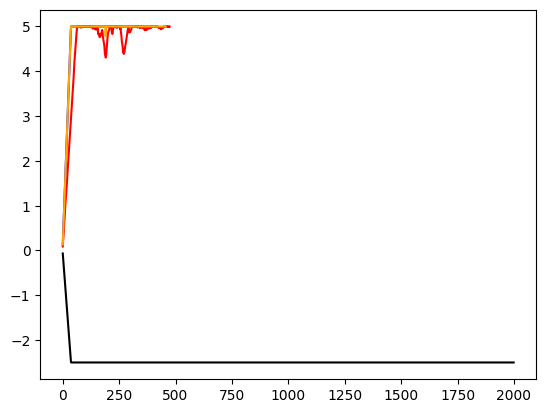

In [17]:
plt.plot(mean_speeds, color='blue')
plt.plot(mean_speeds2, color='red')
plt.plot(mean_speeds3, color='orange')
plt.plot(mean_speeds4, color='black')
plt.show()

...so that explains it. The A2C model is permanently driving backwards. Other than that, I'm fairly happy with how the models are all accelerating to top speed at roughly the same pace. 

My final conclusion is that all of the models are roughly appropriate for this task. The largest challenges here were keeping the agents from getting stuck in local optima with the design of the reward function. It went through by far the most iterations. Agents would sit and do nothing (overpenalizing mistakes), then they would drive into the corner at top speed (so speed reward needed to turn into displacement reward), then they would collect a few targets and then stop (poorly calibrated target rewards). In the end the current reward function is much, much more complicated than the original one.

More important thatn reward function though, again, is the length of training. That was the most important factor, and maybe the A2C models could perform well if given long enough to train. My empirical experience with the model leads me to doubt that, though, and that opinion is reinforced by my contemporaries.